<a href="https://colab.research.google.com/github/Baxi19/Operativos_2/blob/main/Operativos_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instituto Tecnológico de Costa Rica
# Campus Tecnológico Local San Carlos
# Escuela de Ingeniería en Computación
# Principios de Sistemas Operativos
# Segundo Proyecto
# Kevin Camacho Araya
# Jazmine Espinoza Palma
# Randald Villegas Brenes
# IS-2021

## Arquitectura 

#### Para esta solución se plantea tener una lista que contenga informacion de los diferentes sitios web, esta informacion que se almacena en la lista es una noticia que esta compuesta de un titulo y el cuerpo de la noticia 

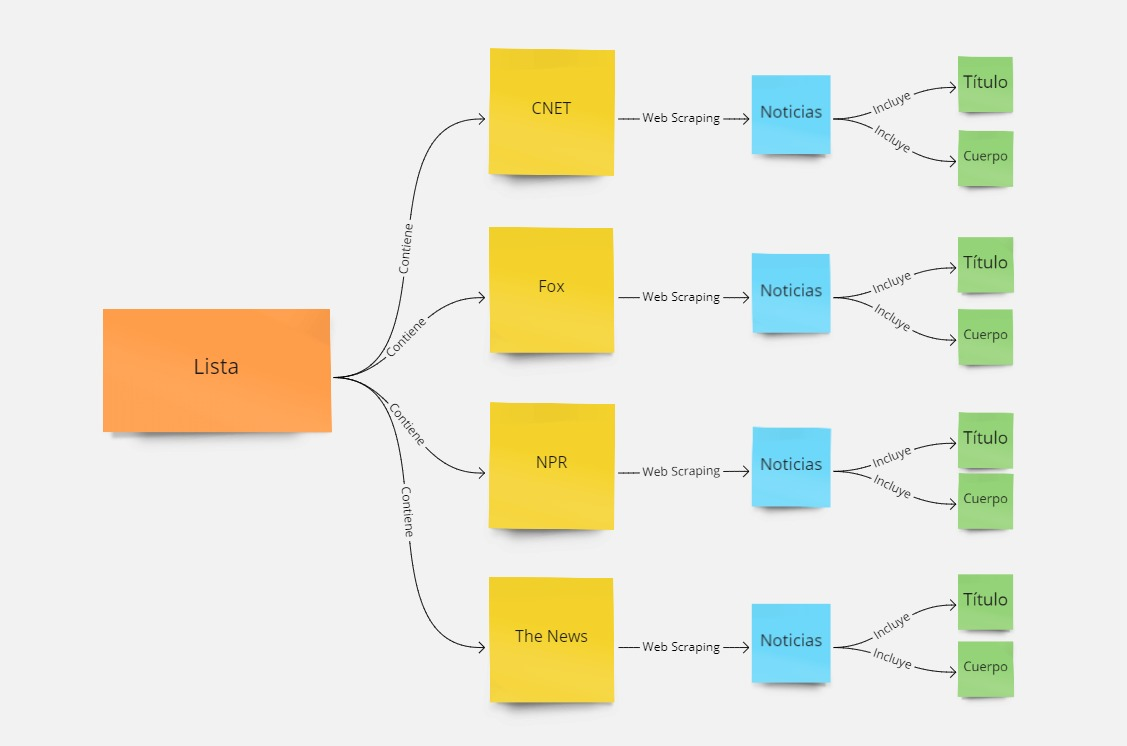

## Modelo

#### Para el modelo se obtuvieron datos de un dataset de artículos, luego se asignaron diferentes cantidades de datos para entrenar y sus respectivas pruebas, luego se entrena el modelo, para finalmente obtener la información de las noticias y clasificarlas según el título y contenido de la noticia.

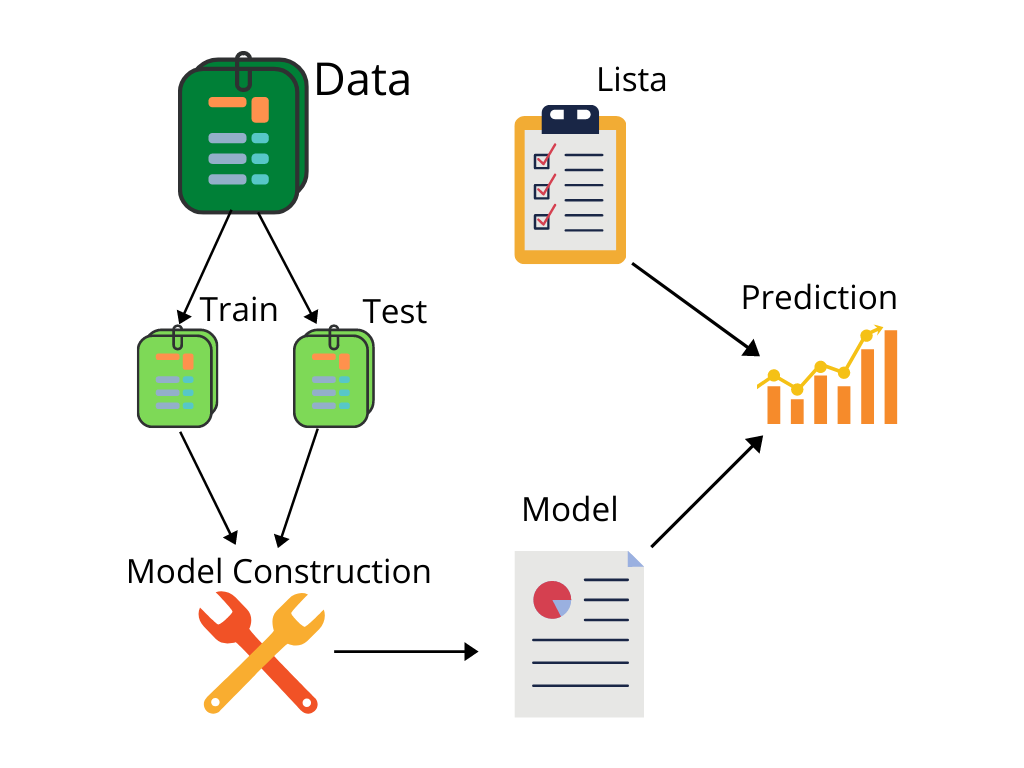

#### Primero se realizan las importaciones necesarias para la solución

In [1]:
!pip install kora -q
from kora.selenium import wd
from bs4 import BeautifulSoup
import bs4
import requests

# Model
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups

# Import necesary packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import  make_pipeline


     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 


#### Se crea una lista que permite almacenar los resultados de las noticias obtenidas a través de Web Scraping

In [2]:
news = [];

#### Acontinuacion se muestras una lista con los sitios que se le pretende hacer Web Scrapping:
*   `CNET`
*   `FOX`
*   `NPR`
*   `THE NEWS`

#### Método para extraer datos de `CNET`

In [3]:
#def cnet(i, shared_list):
def cnet():
  HOME_URL = "https://www.cnet.com/tech-enabled/"
  XPATH_TITLE = '//div[contains(@class, "c-premiumList_link")]'
  XPATH_BODY = '//div[contains(@class, "c-premiumList_desc")]'

  wd.get(HOME_URL)
  all_news = wd.find_elements_by_xpath(XPATH_TITLE)
  all_body = wd.find_elements_by_xpath(XPATH_BODY)

  i = 0
  print("CNET News> Start..")
  for new in all_news:
    news.append({
    #shared_list.append({
        "news": "CNET",
        "title": new.get_property("innerText"),
        "body": (all_body[i].get_property("innerText"))
        }
        )
    i += 1
    
  print("CNET News> End..")

#### Método para extraer datos de `FOX`

In [4]:
#def fox(i, shared_list):
def fox():
  HOME_URL = "https://www.foxnews.com/us"
  XPATH_TITLE = '//section[contains(@class, "collection-article-list")]//div[contains(@class, "info")]/header//h4[contains(@class, "title")]'
  XPATH_BODY = '//section[contains(@class, "collection-article-list")]//div[contains(@class, "info")]/div[contains(@class, "content")]'

  wd.get(HOME_URL)
  all_news = wd.find_elements_by_xpath(XPATH_TITLE)
  all_body = wd.find_elements_by_xpath(XPATH_BODY)

  i = 0
  print("FOX News> Start..")
  for new in all_news:
    news.append({
    #shared_list.append({
        "news": "FOX",
        "title": new.get_property("innerText"),
        "body": (all_body[i].get_property("innerText"))
        }
        )
    i += 1
    
  print("FOX News> End..")

#### Método para extraer datos de `NPR`

In [5]:
#def npr(i, shared_list):
def npr():
  HOME_URL = "https://www.npr.org/sections/news/"
  XPATH_TITLE = '//div[contains(@class, "list-overflow")]//article[contains(@class, "item")]//h2[contains(@class, "title")]'
  XPATH_BODY = '//div[contains(@class, "list-overflow")]//article[contains(@class, "item")]//p[contains(@class, "teaser")]'

  wd.get(HOME_URL)
  all_news = wd.find_elements_by_xpath(XPATH_TITLE)
  all_body = wd.find_elements_by_xpath(XPATH_BODY)

  i = 0
  print("NPR - National Public Radio> Start..")
  for new in all_news:
    news.append({
    #shared_list.append({
        "news": "NPR",
        "title": new.get_property("innerText"),
        "body": (all_body[i].get_property("innerText")).split("• ")[1]
        }
        )
    i += 1
    
  print("NPR - National Public Radio> End..")

#### Método para extraer datos de `THE NEWS`

In [6]:
#def the_news(i, shared_list):
def the_news():
    print("THE NEWS> Start..")
    scraper = Scraper()
    query = Query()
    info=query.get_url()
    for x in info:
        Body=scraper.get(x["link"])
        news.append({
        #shared_list.append({
            "news": "THE NEWS",
            "title":x["title"],
            "body":Body
            })
    print("THE NEWS> End..")
   
class Response(object):
    def __init__(self, status, content):
        self.status = status
        self.content = content

    def valid(self):
        return (self.status == 200)

class Browser(object):
    def get(self, url):
        headers = {
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
        request = requests.get(url, headers=headers)
        response = Response(request.status_code, request.content)
        return response

class Query(object):
    # Standard constructor (w/ parameters)
    def __init__(self):
        self.url ="https://www.thenews.com.pk"
    # Returns the URL of the created query

    def get_url(self):
        scra = Scraper()
        return scra.search(self.url)
       

class Scraper(object):
    def __init__(self):
        self.browser = Browser()
        self.response = ""
        self.soup = ""

    def get(self, url):
        self.response = self.browser.get(url)
        self.soup = bs4.BeautifulSoup(
            self.response.content, features="html.parser")
        return self.get_desc()

    def search(self, url):
        self.response = self.browser.get(url)
        self.soup = bs4.BeautifulSoup(self.response.content, features="html.parser")
        return self.extract_url()

    def extract_url(self):
        lista1 = self.soup.find_all("div",class_="laodMoreNews latestNews home_latest_bottom")
        lista2=lista1[0].find_all("li") 
        lista3=[]     
        
        for x in lista2:
            lista3.append({"title":x.a["data-article_name"],"link":x.a["href"]})
    
        return lista3

    def get_desc(self):
        lista1=self.soup.find_all("div",class_="story-detail")
        lista2=lista1[0].find_all("p")
        text=""
        for x in lista2:
            text+=x.text
        return text

#### Ahora comienza el proceso de recopilación de datos a través de Web Scraping

In [7]:
cnet()
fox()
npr()
the_news()

CNET News> Start..
CNET News> End..
FOX News> Start..
FOX News> End..
NPR - National Public Radio> Start..
NPR - National Public Radio> End..
THE NEWS> Start..


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


THE NEWS> End..


#### A continuación, procedemos a crear un modelo de Machine Learning que ayuda a identificar las categorías en las que se encuentra una noticia, para lo cual obtenemos los datos de prueba y se despliegan las diferentes categorías.

In [8]:
# Data to train the model
data = fetch_20newsgroups()

# Show all the categories
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

#### Se crea una lista para almacenar los nombres de las categorías con las que se pretende entrenar un modelo

In [9]:
# Defining all the categories
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

#### Ahora se seleccionan los datos para el entrenamiento y la prueba.

In [10]:
# Training the data on these categories
train = fetch_20newsgroups(subset='train', categories=categories)

# Testing the data on these categories
test = fetch_20newsgroups(subset='test', categories=categories)

#### Cantidad de articulos (Entrenamiento y Prueba ) para entrenamiento del algoritmo

In [11]:
# Print data size
print("Train Size: " + str(len(train.data)))
print("Test Size: " + str(len(test.data)))

Train Size: 11314
Test Size: 7532


#### Se muestra la información de un artículo para ver su contenido

In [12]:
# Print data item
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

#### Se procede a entrenar el modelo

In [13]:
# Creating a model based on Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

#Training the model with the train data
model.fit(train.data, train.target)

# Creating labels for the test data
labels = model.predict(test.data)

#### Se crea una matriz de confusión para ver cómo predice el algoritmo, asi poder observar si cae en falsos negativos

Text(89.17999999999999, 0.5, 'Predicted label')

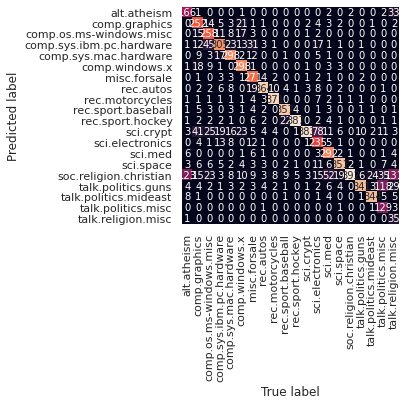

In [14]:
# Creating confusion matrix and heat map
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)

# Plotting Heatmap of Confusion Matrix
plt.xlabel('True label')
plt.ylabel('Predicted label')

#### Se crea un método que se encarga de hacer las predicciones

In [15]:
# Predicting category on new data based on trained model
def predict_category(s, train=train, model=model):
  pred = model.predict([s])
  return train.target_names[pred[0]]

#### Procedemos a agregar las predicciones en cada noticia, en base al `titular` y al `cuerpo` de cada noticia

In [16]:
for new in news:
  new["predict"] = predict_category("title: " + new["title"] + "\n" + "body: " + new["body"])

#### Ahora se procede a mostar los resultados obtenidos

In [17]:
id = 1
for new in news:
  print("\n\nId: "+ str(id) +"\nNews: " + new["news"] +"\nTitle: " + new["title"] + "\nBody: " + new["body"] + "\nPredict: " + new["predict"])
  id+=1



Id: 1
News: CNET
Title: Where Clubhouse and Twitter Spaces fall short
Body: Good luck trying to participate in live audio chats if you have hearing loss. But improvements are in the works.
Predict: soc.religion.christian


Id: 2
News: CNET
Title: COVID-19 showed digital accessibility is critical. Advocates don't want you to forget
Body: As more people get vaccinated and the world reopens, experts say remote work, virtual events and e-commerce sites should still cater to people with disabilities.
Predict: sci.crypt


Id: 3
News: CNET
Title: Apple brings sign language support to its stores, plans new accessibility features
Body: A new feature will let people who only have the use of one arm control an Apple Watch by clenching their fist or pinching their fingers.
Predict: soc.religion.christian


Id: 4
News: CNET
Title: Instagram Stories adds auto-caption sticker so you can watch without sound
Body: It's a feature accessibility advocates have long requested.
Predict: rec.autos


Id: 5


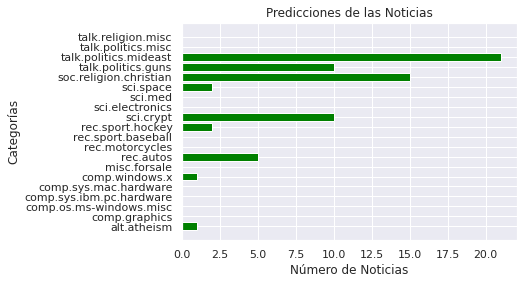

In [18]:
import matplotlib.pyplot as plt

eje_y = []

for cat in categories:
  count = 0
  for new in news:
    if new["predict"] == cat:
      count += 1
  eje_y.append(count)

plt.barh(categories, eje_y, color="green")
plt.xlabel('Número de Noticias')
plt.ylabel('Categorías')
plt.title('Predicciones de las Noticias')
plt.show()

#### Ahora que el modelo predice es posible guardar el modelo para no tener que entrenarlo nuevamente cada vez que se requiera

In [19]:
# Save the model
import pickle

Pkl_Filename = "model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

#### Es posible cargar el modelo guardado, para esto lo podemos hacer de la siguiente manera

In [20]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    load_model = pickle.load(file)

load_model

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

#### Se crea un método que se encarga de hacer las predicciones, en este caso con el modelo cargado: `load_model`

In [21]:
# Predicting category on load model
def predict_load_category(s, train=train, model=load_model):
  pred = load_model.predict([s])
  return train.target_names[pred[0]]

#### Ahora se procede a probar el modelo cargado

In [22]:
# Testing the load model
predict_load_category('Car')

'rec.autos'